In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [6]:
path = '"/home/papalio/test_research/python_edu/test_2024/test_2024/DATA/org/sgd/2020/01/01/sfc_grid_ta_202001010000.nc"'
path2 = '/home/papalio/test_research/python_edu/class0/example_0914/AR6_SSP585_5ENSMN_skorea_TA_gridraw_daily_2021.nc'
ds = xr.open_dataset(path2)
ds

<xarray.Dataset> Size: 659MB
Dimensions:    (time: 365, latitude: 601, longitude: 751)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2021-01-01 2021-01-02 ... 2021-12-31
  * latitude   (latitude) float32 2kB 33.0 33.01 33.02 ... 38.98 38.99 39.0
  * longitude  (longitude) float32 3kB 124.5 124.5 124.5 ... 132.0 132.0 132.0
Data variables:
    TA         (time, latitude, longitude) float32 659MB ...

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.MaskedArray with masked values

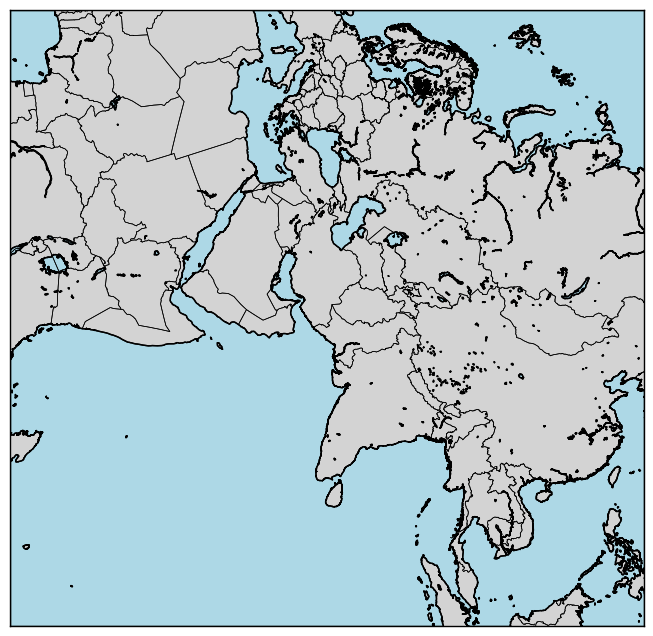

In [15]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# 📌 NetCDF 파일 경로
file_path = "/home/papalio/test_research/python_edu/test_2024/test_2024/DATA/org/sgd/2020/01/01/sfc_grid_ta_202001010000.nc"

# 📌 NetCDF 파일 열기
ds = xr.open_dataset(file_path)
temperature = ds["data"].values / ds["data"].attrs["data_scale"]  # 데이터 스케일 적용하여 °C 변환

# 📌 결측값 (-9990) 제거
temperature[temperature < -100] = np.nan  # -100 이하인 값은 NaN으로 설정

# 📌 격자 크기 설정
nx, ny = ds.sizes["nx"], ds.sizes["ny"]
grid_size = ds.attrs["grid_size"]  # 0.5도 해상도

# 📌 중심 좌표 (Lambert Conformal Projection)
lon_0 = ds.attrs["map_slon"]  # 기준 경도 (126.0)
lat_0 = ds.attrs["map_slat"]  # 기준 위도 (38.0)

# 📌 경위도 범위 설정 (잘못된 범위를 수정)
lat_offset = (ny // 16) * grid_size  # 위도 오차 조정 (//16 사용)
lon_offset = (nx // 16) * grid_size  # 경도 오차 조정 (//16 사용)

lon_min, lon_max = lon_0 - lon_offset, lon_0 + lon_offset
lat_min, lat_max = lat_0 - lat_offset, lat_0 + lat_offset

# 📌 경위도 좌표 생성
lons = np.linspace(lon_min, lon_max, nx)
lats = np.linspace(lat_min, lat_max, ny)
lon_grid, lat_grid = np.meshgrid(lons, lats)

# 📌 Basemap 설정 (한반도 중심)
fig, ax = plt.subplots(figsize=(10, 8))

m = Basemap(
    projection="lcc",
    llcrnrlon=lon_min, urcrnrlon=lon_max,
    llcrnrlat=max(lat_min, -90),  # 유효한 값으로 제한
    urcrnrlat=min(lat_max, 90),   # 유효한 값으로 제한
    lat_0=lat_0, lon_0=lon_0,
    lat_1=30, lat_2=60,  # 표준 병진 위도 설정
    resolution="i", ax=ax,
    ellps="WGS84"  # 지구 타원체 모델 사용
)

# 📌 지도 기본 설정
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color="lightblue")
m.fillcontinents(color="lightgray", lake_color="lightblue")

# 📌 온도 데이터 시각화
x, y = m(lon_grid, lat_grid)
temp_plot = m.pcolormesh(x, y, temperature, cmap="RdBu_r", shading="auto", vmin=-30, vmax=30)

# 📌 컬러바 추가
cbar = plt.colorbar(temp_plot, ax=ax, orientation="vertical", shrink=0.7)
cbar.set_label("Temperature (°C)")

# 📌 제목 추가
plt.title(f"Surface Air Temperature ({ds.attrs['time'][0]}-{ds.attrs['time'][1]:02d}-{ds.attrs['time'][2]:02d} {ds.attrs['time'][3]:02d}:{ds.attrs['time'][4]:02d})")

# 📌 이미지 저장
output_path = "/home/papalio/test_research/RMSE_TEST/IMG/ta_distribution_fixed.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"📊 시각화 완료: {output_path}")
